In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Mining_Prj/phase_1/GooglePlay.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10841.0,5420.000000,3129.671468,0.0,2710.0,5420.0,8130.0,10840.0
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [38]:
# Unnamed: 0, App, Category, Rating, Reviews, Size, Installs, Type, Price,
# Content Rating, Genres, Last Updated, Current Ver, Android Ver

for col in ['Reviews',	'Size',	'Installs',	'Price']:
  # extract numbers
  df[col] = df[col].str.extract('(\d+)')

  # replace NaN values with 0
  df[col] = df[col].fillna(0)

  # cast as int
  df[col] = df[col].astype('int')

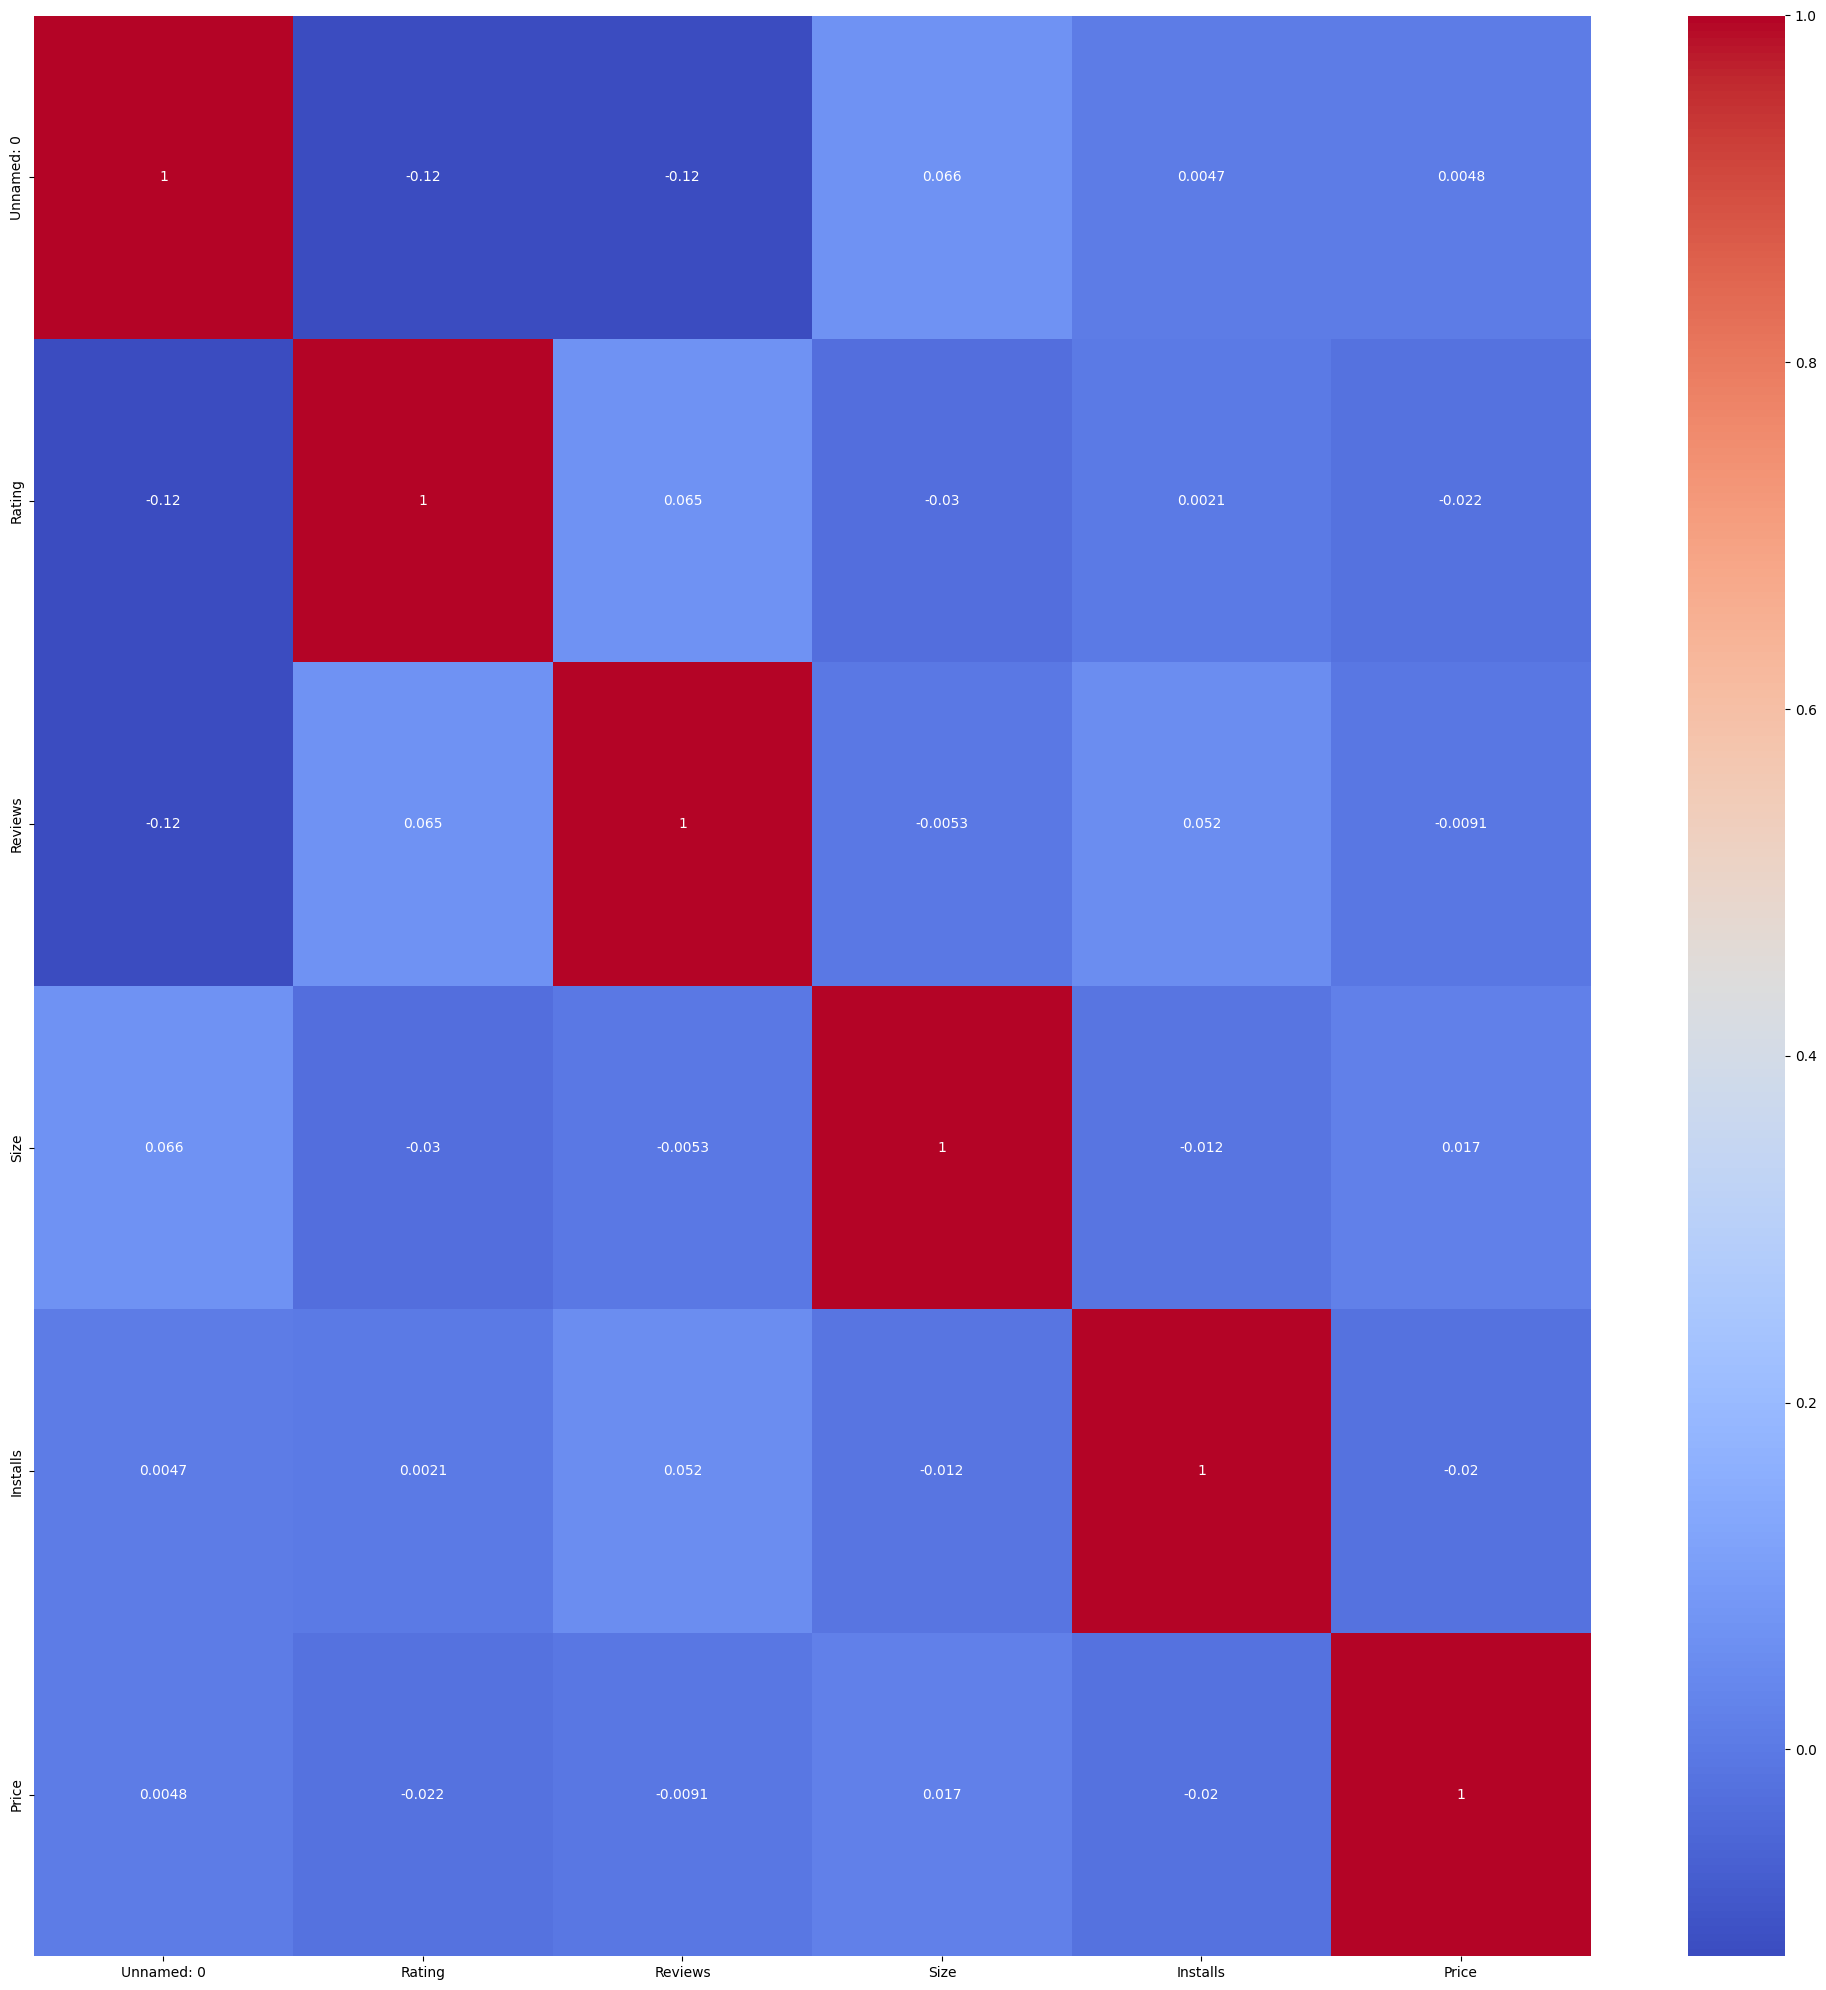

In [35]:
numeric_vals = df.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

## Part 1 - Knowing the dataset

In [42]:
def analyze_dataset(dataset):
    results = []
    Nominal = ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

    for column_name, column_data in dataset.items():
        # Initialize variables
        range_val = None
        min_val = None
        max_val = None
        mean_val = None
        mode = None
        median_val = None
        outliers = None

        # Basic information
        data_type = column_data.dtype.name
        unique_values = column_data.unique()
        unique_count = len(unique_values)

        if unique_count == 2 and set(unique_values) == {0, 1}:
            # Binary column
            data_type = "Binary"
        elif any(column_name == i for i in Nominal):
            # Categorical column
            data_type = "Nominal"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()
        # elif column_name == "Diet":
        #     data_type  = "Ordinal"
        else:
            # Numeric column
            data_type = "Numeric"
            range_val = column_data.max() - column_data.min()
            min_val = column_data.min()
            max_val = column_data.max()
            mean_val = column_data.mean()
            mode = df[column_name].mode()[0]
            median_val = column_data.median()

            # Outliers
            data_std = df[column_name].std()
            q1 = df[column_name].quantile(0.25)
            q3 = df[column_name].quantile(0.75)
            iqr = q3 - q1
            outliers = df[(df[column_name] < q1 - 1.5*iqr) | (df[column_name] > q3 + 1.5*iqr)][column_name].tolist()


        # Save results for this column
        results.append({
            "Name": column_name,
            "Type": data_type,
            "Range": range_val,
            "Min": min_val,
            "Max": max_val,
            "Mean": mean_val,
            "Mode": mode,
            "Median": median_val,
            "Outlier": outliers
        })

    # Create a new DataFrame with the results
    df_results = pd.DataFrame(results)

    return df_results

In [43]:
analyze_dataset(df)

,Name,Type,Range,Min,Max,Mean,Mode,Median,Outlier
0,Unnamed: 0,Numeric,10840.0,0.0,10840.0,5420.000000,0,5420.0,[]
1,App,Nominal,NaN,NaN,NaN,NaN,ROBLOX,NaN,None
2,Category,Nominal,NaN,NaN,NaN,NaN,FAMILY,NaN,None
3,Rating,Numeric,18.0,1.0,19.0,4.193338,4.4,4.3,"[3.2, 3.2, 3.1, 3.2, 3.2, 2.6, 3.1, 3.0, 1.9, ..."
4,Reviews,Numeric,78158306.0,0.0,78158306.0,444111.926575,0,2094.0,"[215644, 194216, 224399, 295221, 174531, 27192..."
5,Size,Numeric,1020.0,0.0,1020.0,31.091781,0,10.0,"[201, 73, 66, 79, 118, 695, 77, 70, 77, 84, 97..."
6,Installs,Numeric,500.0,0.0,500.0,72.404391,10,10.0,"[500, 500, 500, 500, 500, 500, 500, 500, 500, ..."
7,Type,Nominal,NaN,NaN,NaN,NaN,Free,NaN,None
8,Price,Numeric,400.0,0.0,400.0,0.961719,0,0.0,"[4, 4, 4, 4, 3, 3, 6, 1, 2, 3, 7, 3, 3, 5, 3, ..."
9,Content Rating,Nominal,NaN,NaN,NaN,NaN,Everyone,NaN,None


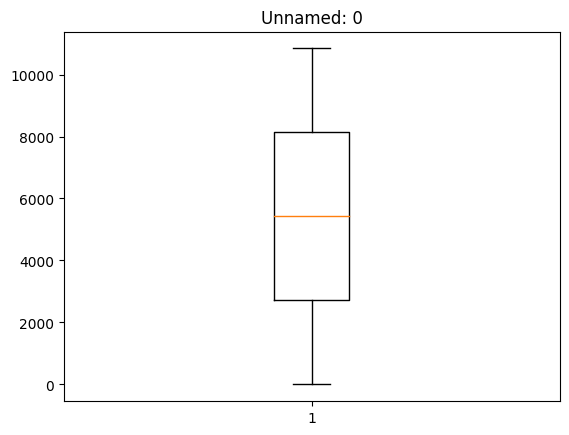

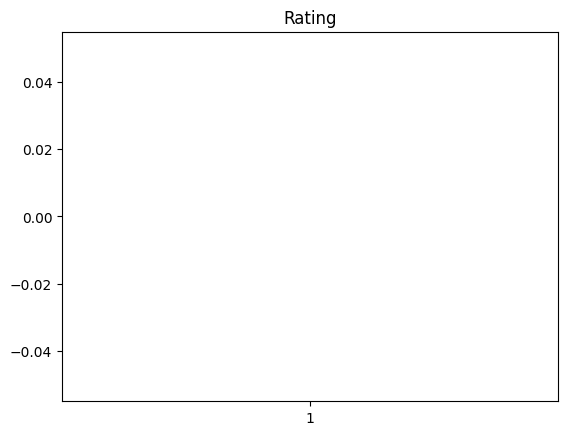

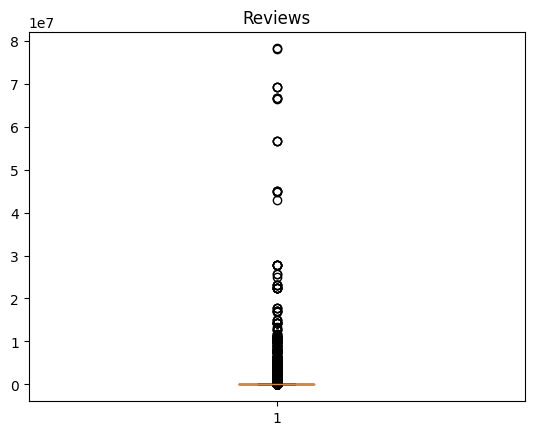

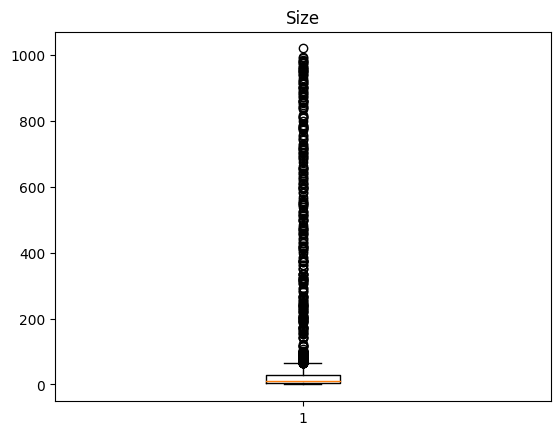

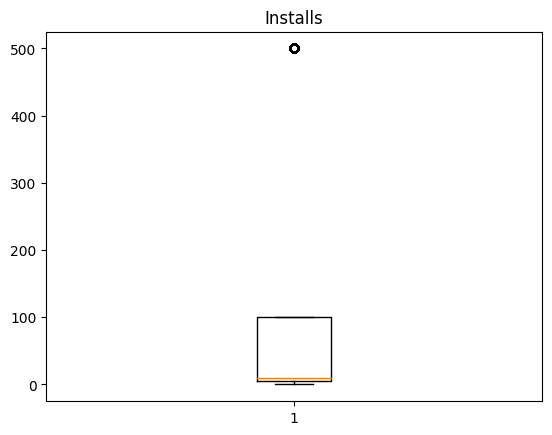

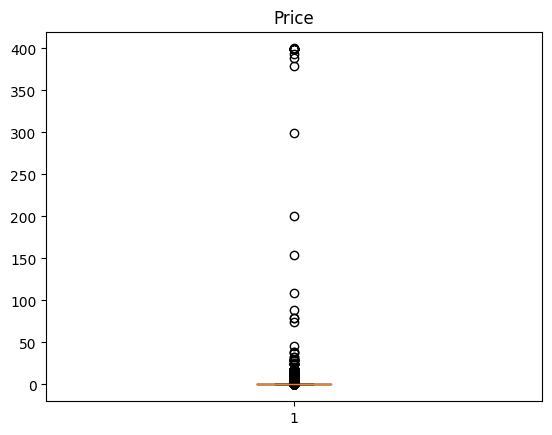

In [41]:
# numeric = ["Age", "Cholesterol", "Heart Rate", "Exercise Hours Per Week", "Sedentary Hours Per Day", "Income", "BMI", "Triglycerides", "Sleep Hours Per Day", ]
numeric = df.select_dtypes(include=['number']).columns
for feature in numeric:
    # Create a box plot
    plt.boxplot(df[feature])
    # Add a title
    plt.title(feature)
    # Show the plot
    plt.show()

In [ ]:
analyze_dataset(df)

,Name,Type,Range,Min,Max,Mean,Mode,Median,Outlier
0,Patient ID,Nominal,NaN,NaN,NaN,NaN,BMW7812,NaN,None
1,Age,Numeric,72.000000,18.000000,90.000000,53.707977,90,54.000000,[]
2,Sex,Nominal,NaN,NaN,NaN,NaN,Male,NaN,None
3,Cholesterol,Numeric,280.000000,120.000000,400.000000,259.877211,235,259.000000,[]
4,Blood Pressure,Nominal,NaN,NaN,NaN,NaN,146/94,NaN,None
5,Heart Rate,Numeric,70.000000,40.000000,110.000000,75.021682,94,75.000000,[]
6,Diabetes,Binary,NaN,NaN,NaN,NaN,None,NaN,None
7,Family History,Binary,NaN,NaN,NaN,NaN,None,NaN,None
8,Smoking,Binary,NaN,NaN,NaN,NaN,None,NaN,None
9,Obesity,Binary,NaN,NaN,NaN,NaN,None,NaN,None


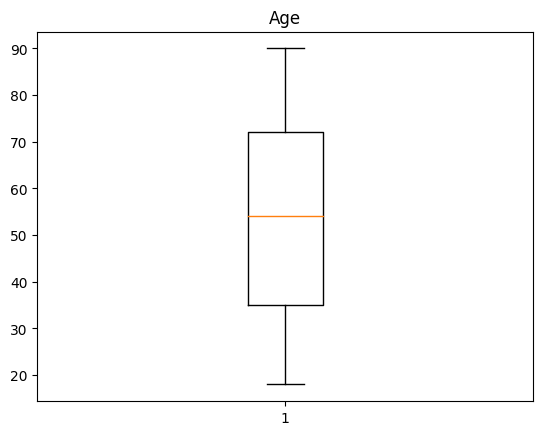

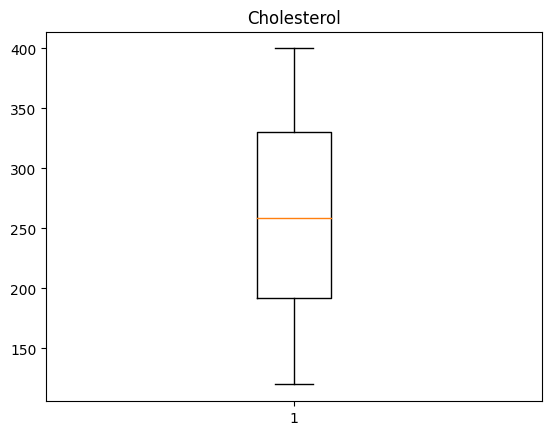

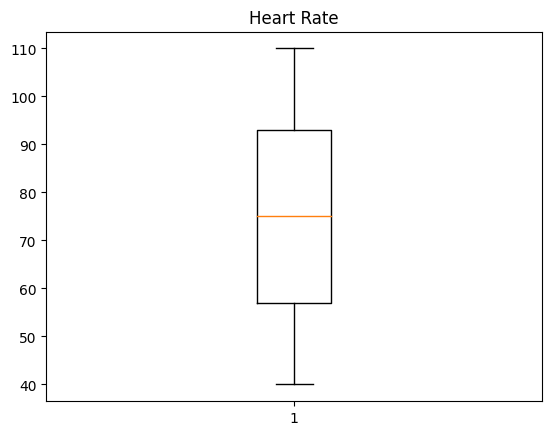

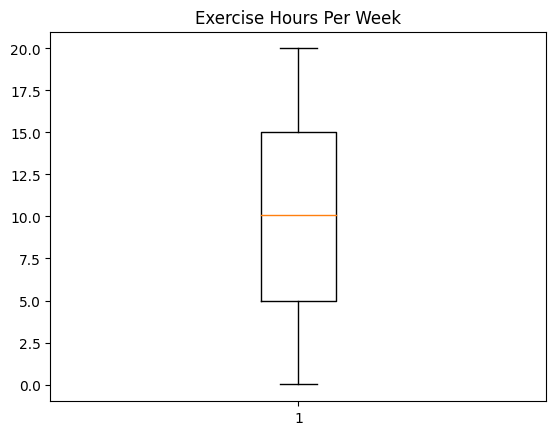

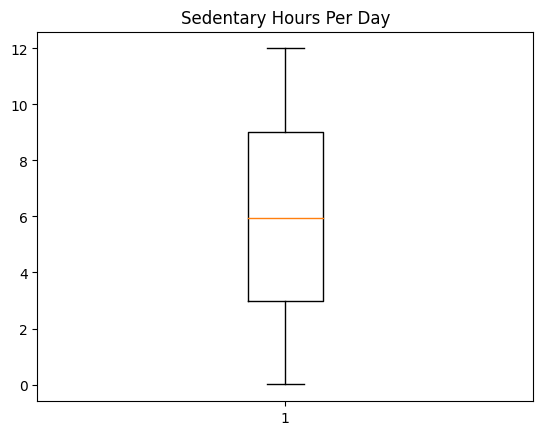

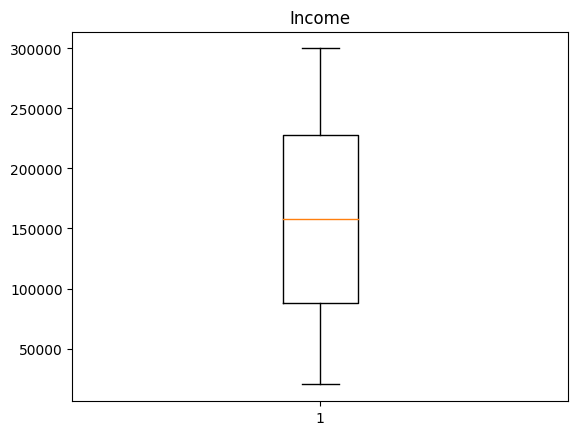

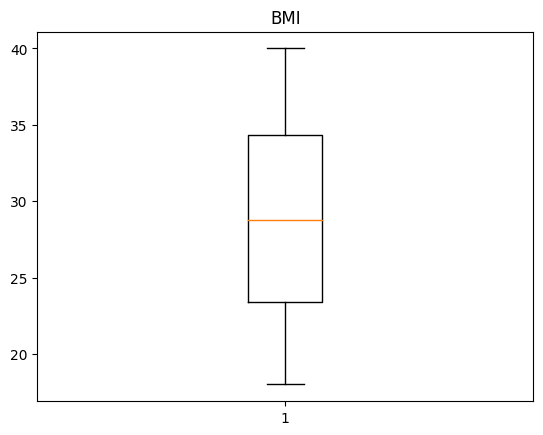

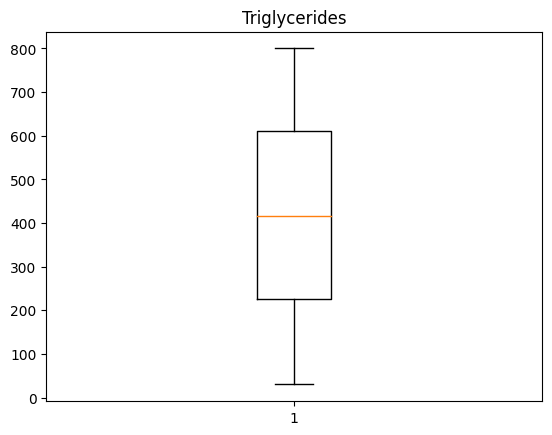

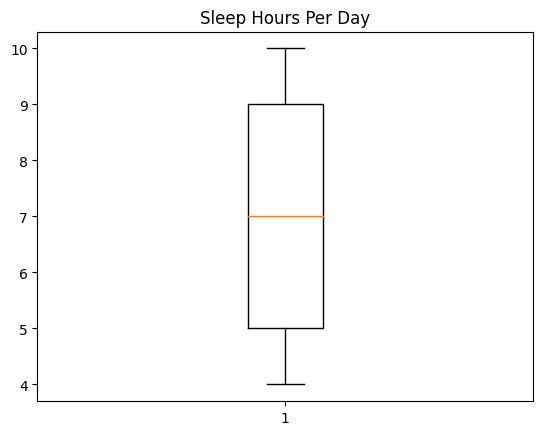

In [ ]:
numeric = ["Age", "Cholesterol", "Heart Rate", "Exercise Hours Per Week", "Sedentary Hours Per Day", "Income", "BMI", "Triglycerides", "Sleep Hours Per Day", ]
# numeric = df.select_dtypes(include=['number']).columns
for feature in numeric:
    # Create a box plot
    plt.boxplot(df[feature])
    # Add a title
    plt.title(feature)
    # Show the plot
    plt.show()